In [2]:
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import pytraj as pt
import re
import glob
import pickle 

# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots as mpl
import pyemma.coordinates as coor


In [ ]:
pwd # to know where we are

In [4]:
directo='/home/janet/Desktop/HSVTK/THM/'
trajfiles_THM=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_THM.pdb'

directo='/home/janet/Desktop/HSVTK/THM_ATP/'
trajfiles_THM_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM_ATP='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_THM_ATP.pdb'

directo='/home/janet/Desktop/HSVTK/GCV/'
trajfiles_GCV=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_GCV.pdb'

directo='/home/janet/Desktop/HSVTK/GCV_ATP/'
trajfiles_GCV_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV_ATP='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_GCV_ATP.pdb'

In [5]:
MD = pt.iterload(trajfiles_THM, top=topfile_THM)

In [ ]:
hbonds = []
for frame in MD:
    selected = pt.Trajectory(top=MD.top)
    selected.append(frame)
    selected.save('temp.pdb', overwrite=True)
    
    F = pt.load('temp.pdb')
    hbond = pt.search_hbonds(F,options='nointramol')
    hbonds.append(hbond)

In [ ]:
def Filter(datalist):
    # Search data based on regular expression in the list
    return [val for val in datalist
            if re.search(r'THM', val)]

In [ ]:
hbonds_acceptors_donors = []
for frame in hbonds:
    hb = hbond.donor_acceptor
    subs = Filter(frame.donor_acceptor)
    hbonds_acceptors_donors.extend(subs)

In [ ]:
hbonds_subs= list(set(hbonds_acceptors_donors))

In [ ]:
hbond_freq = []

for element in hbonds_subs: 
    freq= hbonds_acceptors_donors.count(element)
    hbond_freq.append(freq)

In [ ]:
df = pd.DataFrame()

In [ ]:
df['Hbonds'] = hbonds_subs
df['Freqs'] = hbond_freq

In [ ]:
df = df.sort_values('Freqs')

In [ ]:
fig, ax= plt.subplots(figsize=(10,20))
ax.barh( df['Hbonds'], df['Freqs'], label="THM",)
ax.legend()
plt.yticks(range(len(df['Hbonds'])), df['Hbonds'])
plt.tight_layout()
plt.grid()

In [ ]:
pickle.dump(df, open ("Hbonds_freq_THM.p", "wb"))

In [ ]:
 del MD,F, hbonds, hbond, hbonds_acceptors_donors, hbonds_subs, hbond_freq, Filter,df['Freqs'], df['Hbonds']

In [ ]:
##############THM_ATP######################################

In [5]:
MD = pt.iterload(trajfiles_THM_ATP, top=topfile_THM_ATP)

In [6]:
hbonds = []
for frame in MD:
    selected = pt.Trajectory(top=MD.top)
    selected.append(frame)
    selected.save('temp.pdb', overwrite=True)
    
    F = pt.load('temp.pdb')
    hbond = pt.search_hbonds(F,options='nointramol')
    hbonds.append(hbond)

In [7]:
def Filter(datalist):
    # Search data based on regular expression in the list
    return [val for val in datalist
            if re.search(r'THM', val)]

In [8]:
hbonds_acceptors_donors = []
for frame in hbonds:
    hb = hbond.donor_acceptor
    subs = Filter(frame.donor_acceptor)
    hbonds_acceptors_donors.extend(subs)

In [9]:
hbonds_subs= list(set(hbonds_acceptors_donors))

In [10]:
hbond_freq = []

for element in hbonds_subs: 
    freq= hbonds_acceptors_donors.count(element)
    hbond_freq.append(freq)

In [11]:
df = pd.DataFrame()

In [12]:
df['Hbonds'] = hbonds_subs
df['Freqs'] = hbond_freq

In [13]:
df = df.sort_values('Freqs')

In [14]:
pickle.dump(df, open ("Hbonds_freq_THM_ATP.p", "wb"))

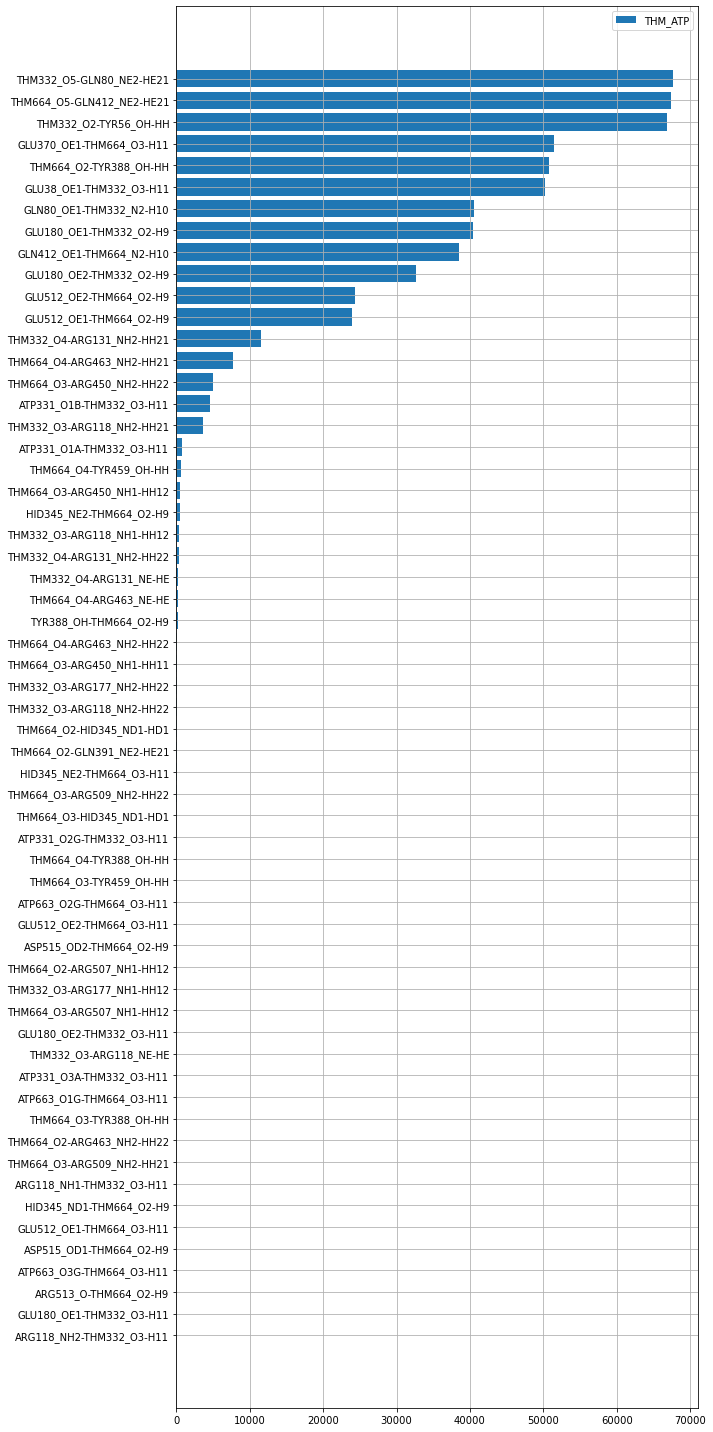

In [15]:
fig, ax= plt.subplots(figsize=(10,20))
ax.barh( df['Hbonds'], df['Freqs'], label="THM_ATP",)
ax.legend()
plt.yticks(range(len(df['Hbonds'])), df['Hbonds'])
plt.tight_layout()
plt.grid()

In [16]:
 del MD,F, hbonds, hbond, hbonds_acceptors_donors, hbonds_subs, hbond_freq, Filter,df['Freqs'], df['Hbonds']

NameError: name 'df' is not defined

In [ ]:
##############THM_ADP######################################

In [5]:
MD = pt.iterload(trajfiles_THM_ADP, top=topfile_THM_ADP)


In [6]:
hbonds = []
for frame in MD:
    selected = pt.Trajectory(top=MD.top)
    selected.append(frame)
    selected.save('temp.pdb', overwrite=True)
    
    F = pt.load('temp.pdb')
    hbond = pt.search_hbonds(F,options='nointramol')
    hbonds.append(hbond)

In [7]:
def Filter(datalist):
    # Search data based on regular expression in the list
    return [val for val in datalist
            if re.search(r'TMP', val)]

In [8]:
hbonds_acceptors_donors = []
for frame in hbonds:
    hb = hbond.donor_acceptor
    subs = Filter(frame.donor_acceptor)
    hbonds_acceptors_donors.extend(subs)

In [9]:
hbonds_subs= list(set(hbonds_acceptors_donors))

In [10]:
hbond_freq = []

for element in hbonds_subs: 
    freq= hbonds_acceptors_donors.count(element)
    hbond_freq.append(freq)

In [11]:
df = pd.DataFrame()

In [12]:
df['Hbonds'] = hbonds_subs
df['Freqs'] = hbond_freq

In [13]:
df = df.sort_values('Freqs')

In [14]:
pickle.dump(df, open ("Hbonds_freq_THM_ADP.p", "wb"))

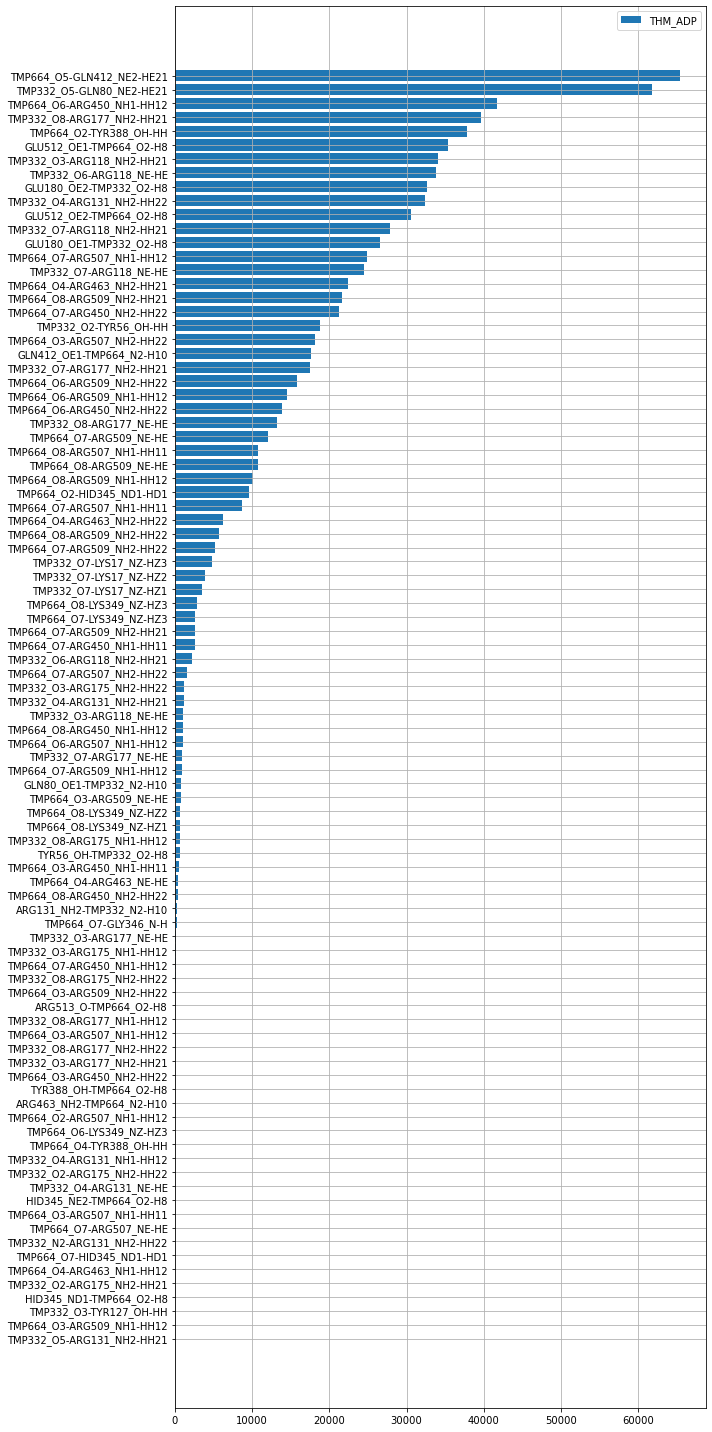

In [15]:
fig, ax= plt.subplots(figsize=(10,20))
ax.barh( df['Hbonds'], df['Freqs'], label="THM_ADP",)
ax.legend()
plt.yticks(range(len(df['Hbonds'])), df['Hbonds'])
plt.tight_layout()
plt.grid()

In [ ]:
 del MD,F, hbonds, hbond, hbonds_acceptors_donors, hbonds_subs, hbond_freq, df, Filter,df['Freqs'], df['Hbonds']

In [ ]:
##############GCV######################################

In [4]:
MD = pt.iterload(trajfiles_GCV, top=topfile_GCV)


In [5]:
hbonds = []
for frame in MD:
    selected = pt.Trajectory(top=MD.top)
    selected.append(frame)
    selected.save('temp.pdb', overwrite=True)
    
    F = pt.load('temp.pdb')
    hbond = pt.search_hbonds(F,options='nointramol')
    hbonds.append(hbond)

In [6]:
def Filter(datalist):
    # Search data based on regular expression in the list
    return [val for val in datalist
            if re.search(r'GA2', val)]

In [7]:
hbonds_acceptors_donors = []
for frame in hbonds:
    hb = hbond.donor_acceptor
    subs = Filter(frame.donor_acceptor)
    hbonds_acceptors_donors.extend(subs)

In [8]:
hbonds_subs= list(set(hbonds_acceptors_donors))

In [9]:
hbond_freq = []

for element in hbonds_subs: 
    freq= hbonds_acceptors_donors.count(element)
    hbond_freq.append(freq)

In [10]:
df = pd.DataFrame()

In [11]:
df['Hbonds'] = hbonds_subs
df['Freqs'] = hbond_freq

In [12]:
df = df.sort_values('Freqs')

In [13]:
pickle.dump(df, open ("Hbonds_freq_GCV.p", "wb"))

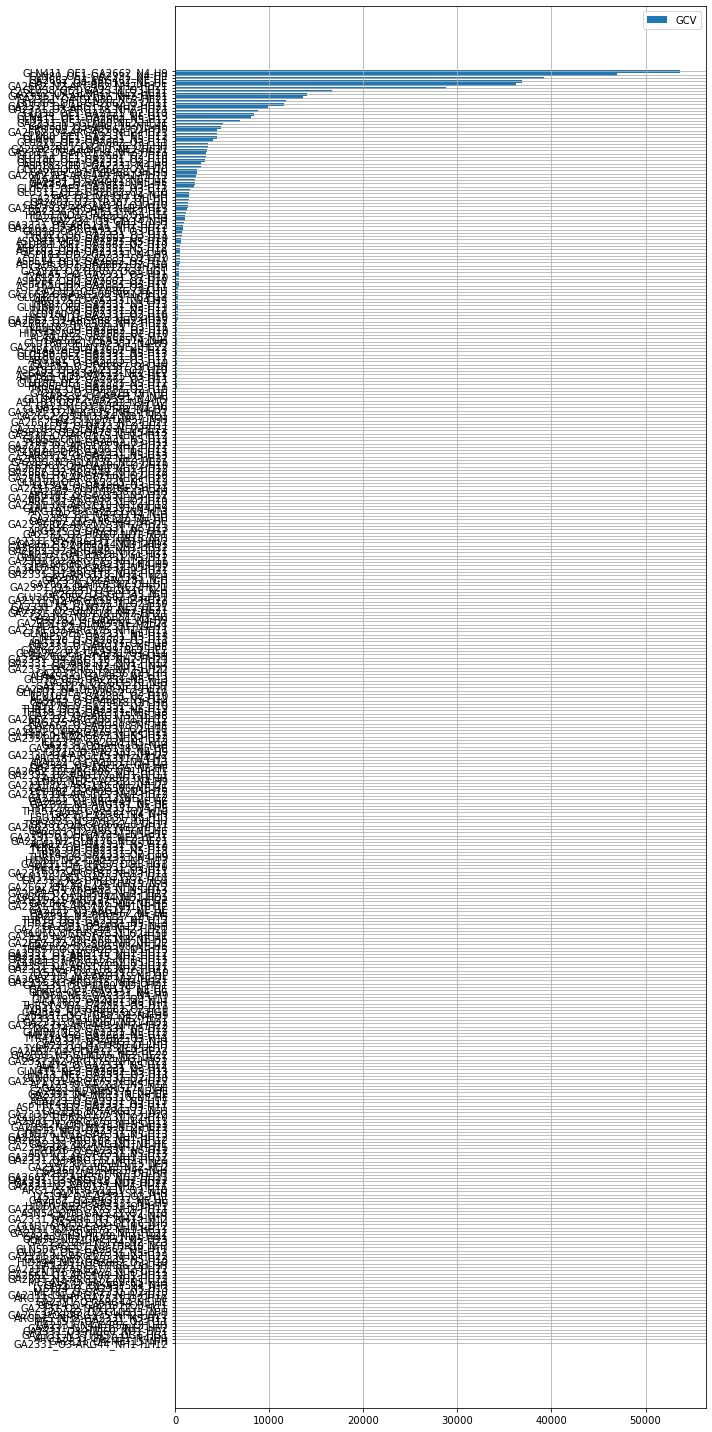

In [14]:
fig, ax= plt.subplots(figsize=(10,20))
ax.barh( df['Hbonds'], df['Freqs'], label="GCV",)
ax.legend()
plt.yticks(range(len(df['Hbonds'])), df['Hbonds'])
plt.tight_layout()
plt.grid()

In [ ]:
 del MD,F, hbonds, hbond, hbonds_acceptors_donors, hbonds_subs, hbond_freq, df, Filter, df['Freqs'], df['Hbonds']

In [ ]:
##############GCV_ATP######################################

In [4]:
MD = pt.iterload(trajfiles_GCV_ATP, top=topfile_GCV_ATP)

In [5]:
hbonds = []
for frame in MD:
    selected = pt.Trajectory(top=MD.top)
    selected.append(frame)
    selected.save('temp.pdb', overwrite=True)
    
    F = pt.load('temp.pdb')
    hbond = pt.search_hbonds(F,options='nointramol')
    hbonds.append(hbond)

In [6]:
def Filter(datalist):
    # Search data based on regular expression in the list
    return [val for val in datalist
            if re.search(r'GA2', val)]

In [7]:
hbonds_acceptors_donors = []
for frame in hbonds:
    hb = hbond.donor_acceptor
    subs = Filter(frame.donor_acceptor)
    hbonds_acceptors_donors.extend(subs)

In [8]:
hbonds_subs= list(set(hbonds_acceptors_donors))

In [9]:
hbond_freq = []

for element in hbonds_subs: 
    freq= hbonds_acceptors_donors.count(element)
    hbond_freq.append(freq)

In [10]:
df = pd.DataFrame()

In [11]:
df['Hbonds'] = hbonds_subs
df['Freqs'] = hbond_freq

In [12]:
df = df.sort_values('Freqs')

In [13]:
pickle.dump(df, open ("Hbonds_freq_GCV_ATP.p", "wb"))

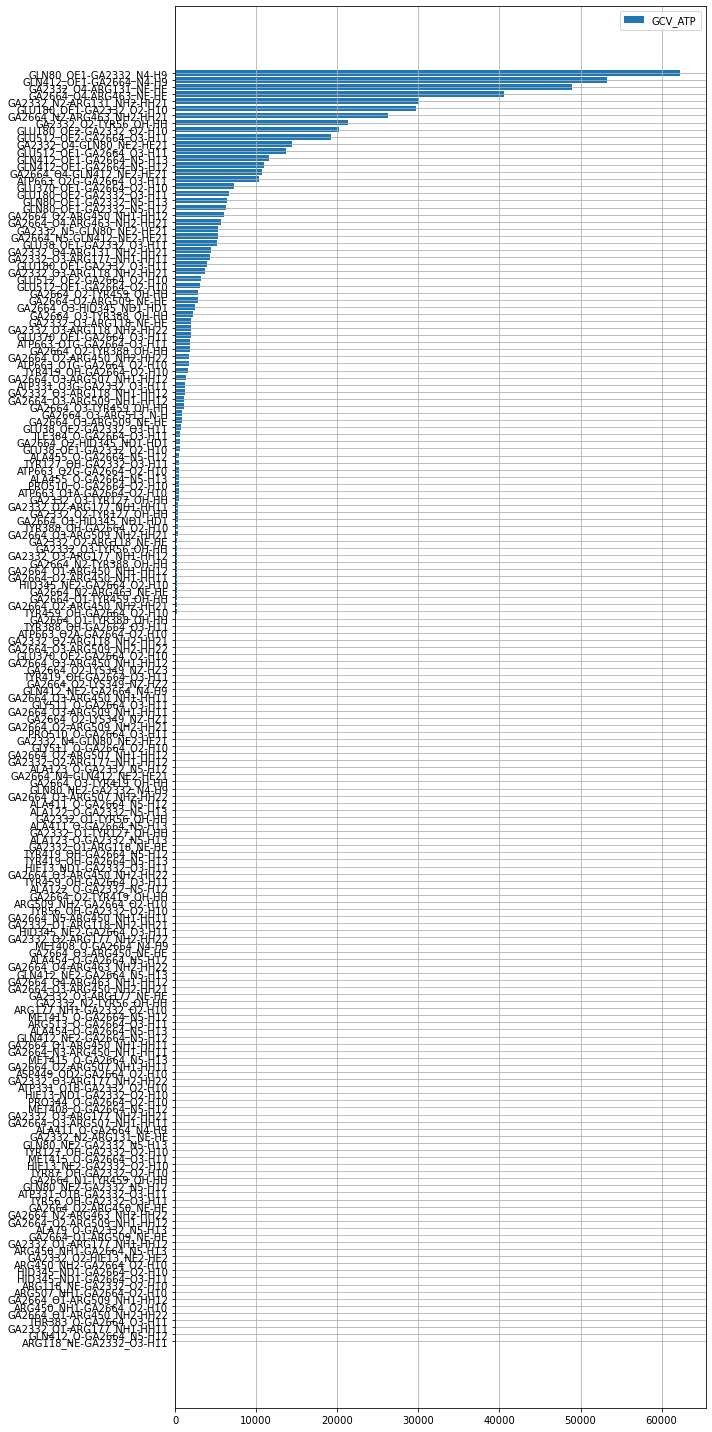

In [14]:
fig, ax= plt.subplots(figsize=(10,20))
ax.barh( df['Hbonds'], df['Freqs'], label="GCV_ATP",)
ax.legend()
plt.yticks(range(len(df['Hbonds'])), df['Hbonds'])
plt.tight_layout()
plt.grid()

In [ ]:
 del MD,F, hbonds, hbond, hbonds_acceptors_donors, hbonds_subs, hbond_freq, df, Filter,df['Freqs'], df['Hbonds']

In [ ]:
##############GCV_ADP######################################

In [4]:
MD = pt.iterload(trajfiles_GCV_ADP, top=topfile_GCV_ADP)

In [5]:
hbonds = []
for frame in MD:
    selected = pt.Trajectory(top=MD.top)
    selected.append(frame)
    selected.save('temp.pdb', overwrite=True)
    
    F = pt.load('temp.pdb')
    hbond = pt.search_hbonds(F,options='nointramol')
    hbonds.append(hbond)

In [6]:
def Filter(datalist):
    # Search data based on regular expression in the list
    return [val for val in datalist
            if re.search(r'GMP', val)]

In [7]:
hbonds_acceptors_donors = []
for frame in hbonds:
    hb = hbond.donor_acceptor
    subs = Filter(frame.donor_acceptor)
    hbonds_acceptors_donors.extend(subs)

In [8]:
hbonds_subs= list(set(hbonds_acceptors_donors))

In [9]:
hbond_freq = []

for element in hbonds_subs: 
    freq= hbonds_acceptors_donors.count(element)
    hbond_freq.append(freq)

In [10]:
df = pd.DataFrame()

In [11]:
df['Hbonds'] = hbonds_subs
df['Freqs'] = hbond_freq

In [12]:
df = df.sort_values('Freqs')

In [13]:
pickle.dump(df, open ("Hbonds_freq_GCV_ADP.p", "wb"))

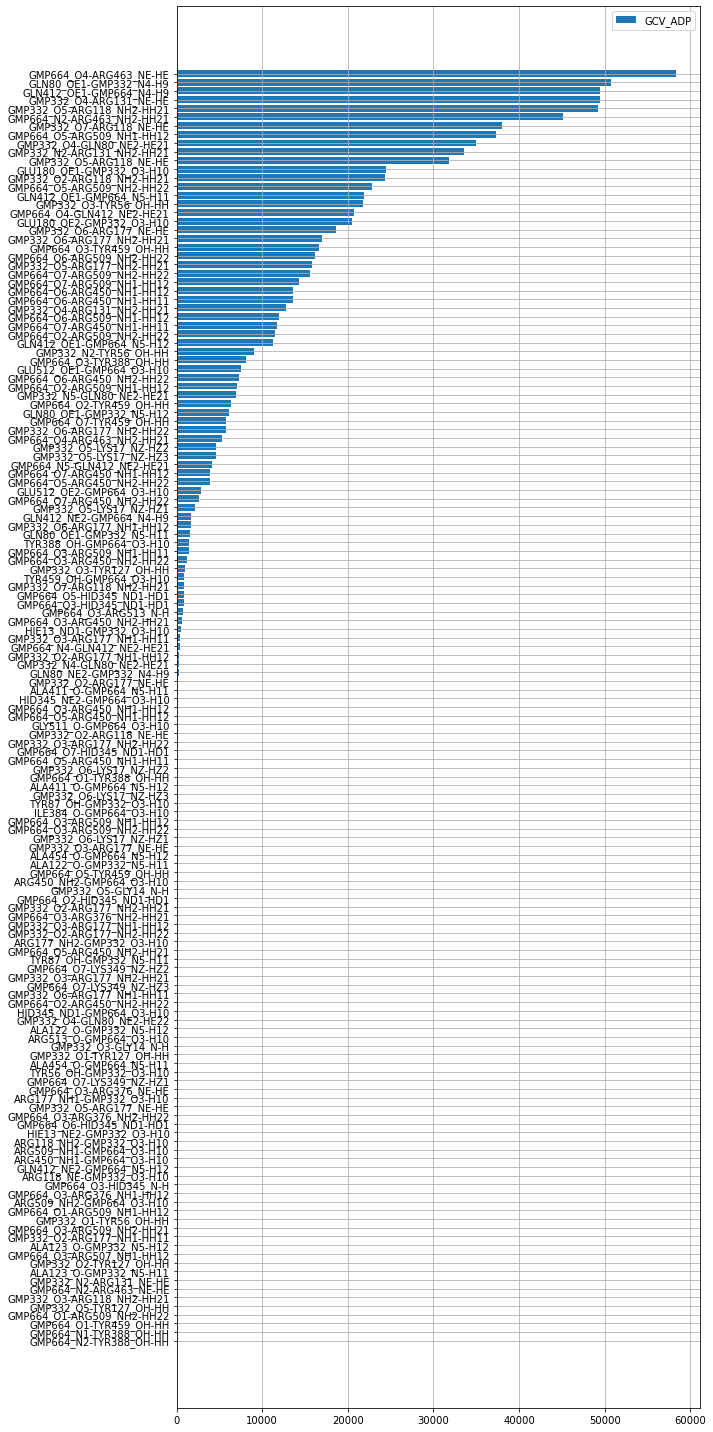

In [14]:
fig, ax= plt.subplots(figsize=(10,20))
ax.barh( df['Hbonds'], df['Freqs'], label="GCV_ADP",)
ax.legend()
plt.yticks(range(len(df['Hbonds'])), df['Hbonds'])
plt.tight_layout()
plt.grid()

In [ ]:
 del MD,F, hbonds, hbond, hbonds_acceptors_donors, hbonds_subs, hbond_freq, df, Filter,df['Freqs'], df['Hbonds']